In [55]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import pandas as pd

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

Y = StandardScaler().fit_transform(X)

In [16]:
Y[:, 0].shape

(750,)

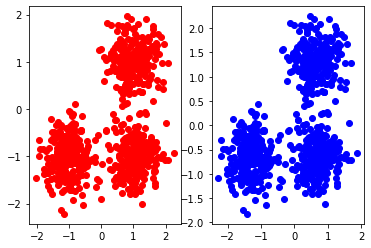

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(X[:, 0], X[:, 1], 'ro')
axes[1].plot(Y[:, 0], Y[:, 1], 'bo')

In [53]:
db = DBSCAN(eps=0.3, min_samples=10).fit(Y)
np.unique(db.labels_)

array([-1,  0,  1,  2], dtype=int64)

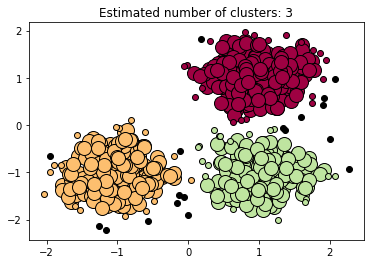

In [54]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_);

In [44]:
~core_samples_mask

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [59]:
df = pd.read_csv('dataset_209770_6.txt', sep=' ', header=0)
df.head()

,x,y
0,112.080593,889.130790
1,503.687821,1292.691681
2,886.027448,1388.365048
3,1102.081022,295.733448
4,979.410733,202.148830


In [62]:
X = df.values
Y = StandardScaler().fit_transform(X)

In [1]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(X[:, 0], X[:, 1], 'r.')
axes[1].plot(Y[:, 0], Y[:, 1], 'b.')

NameError: name 'plt' is not defined

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

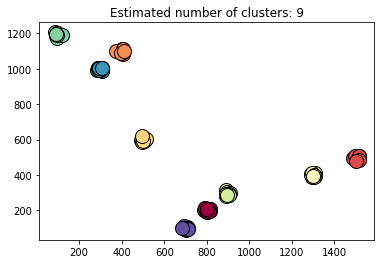

In [7]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

# df = pd.read_csv('dataset_209770_6.txt', sep=' ', header=0)
df = pd.read_clipboard()

X = df.values
Y = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.2, min_samples=5).fit(Y)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show();